In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/MPML/marketing_campaign.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance

In [ ]:
marketing=pd.read_csv('/content/drive/MyDrive/MPML/marketing_campaign.csv',sep=';')
df=marketing
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape# take a rough look over the dataset

(2240, 29)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.isnull().sum()#check missing value

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df['Income'] = df['Income'].fillna(df.Income.mean(), axis = 0)#fill the na value with the mean of income ,since we can not drop the na simply or fill it simply with 0 in this case
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
df.duplicated().sum()#check duplicated

0

In [ ]:
df.info()#check the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])#convert the date column to date type column, and divide into three columns
df['Year_Customer'] = df['Dt_Customer'].apply(lambda x: x.year)
df['Month_Customer'] = df['Dt_Customer'].apply(lambda x: x.month)
df['Day_Customer'] = df['Dt_Customer'].apply(lambda x: x.day)
df = df.drop('Dt_Customer', axis=1)

In [ ]:
le=LabelEncoder()#encode the education column
label=le.fit_transform(df['Education'])
label
df.drop('Education',axis=1)
df['Education']=label

In [ ]:
label1=le.fit_transform(df['Marital_Status'])#encode the marital_Status column
df.drop('Marital_Status',axis=1)
df['Marital_Status']=label1
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Month_Customer,Day_Customer
0,5524,1957,2,4,58138.0,0,0,58,635,88,...,0,0,0,0,3,11,1,2012,9,4
1,2174,1954,2,4,46344.0,1,1,38,11,1,...,0,0,0,0,3,11,0,2014,3,8
2,4141,1965,2,5,71613.0,0,0,26,426,49,...,0,0,0,0,3,11,0,2013,8,21
3,6182,1984,2,5,26646.0,1,0,26,11,4,...,0,0,0,0,3,11,0,2014,2,10
4,5324,1981,4,3,58293.0,1,0,94,173,43,...,0,0,0,0,3,11,0,2014,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,46,709,43,...,0,0,0,0,3,11,0,2013,6,13
2236,4001,1946,4,5,64014.0,2,1,56,406,0,...,0,1,0,0,3,11,0,2014,6,10
2237,7270,1981,2,2,56981.0,0,0,91,908,48,...,0,0,0,0,3,11,0,2014,1,25
2238,8235,1956,3,5,69245.0,0,1,8,428,30,...,0,0,0,0,3,11,0,2014,1,24


In [ ]:
#filtering the features with only one class or single value and drop
for col in df.columns :
    if len(df[col].value_counts()) == 1 :
        print(df[col].value_counts())

3    2240
Name: Z_CostContact, dtype: int64
11    2240
Name: Z_Revenue, dtype: int64


In [ ]:
y=df['Response']#specify the dependent variable and independent variable
x=df.drop(['ID','Response','Z_CostContact','Z_Revenue'],axis=1)
x

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Year_Customer,Month_Customer,Day_Customer
0,1957,2,4,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,2012,9,4
1,1954,2,4,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,2014,3,8
2,1965,2,5,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,2013,8,21
3,1984,2,5,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,2014,2,10
4,1981,4,3,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,2014,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,3,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,2013,6,13
2236,1946,4,5,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,2014,6,10
2237,1981,2,2,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,2014,1,25
2238,1956,3,5,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,2014,1,24


<Axes: >

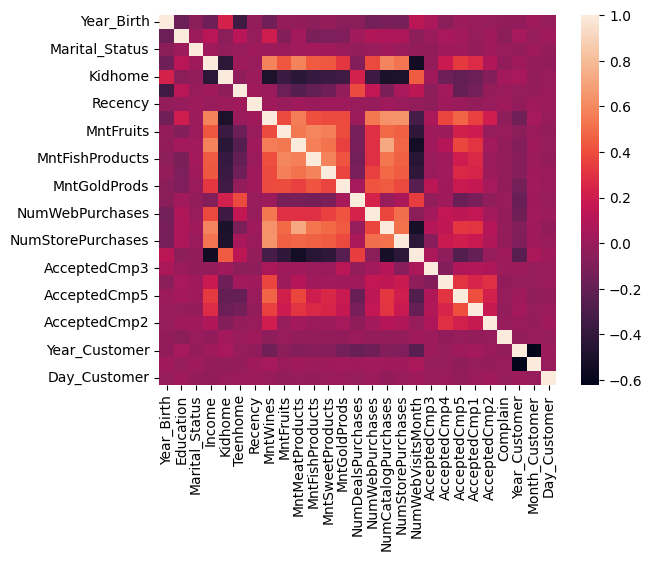

In [ ]:
corr_matrix=x.corr()#check correlation
sns.heatmap(corr_matrix)

In [ ]:
corr_matrix

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Year_Customer,Month_Customer,Day_Customer
Year_Birth,1.000000,-0.171390,-0.060580,-0.160942,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,-0.028188,0.024246,-0.009193
Education,-0.171390,1.000000,0.007090,0.119974,-0.045564,0.118485,-0.011728,0.197576,-0.080412,0.033625,...,-0.040281,0.005836,0.053266,0.033346,-0.010845,0.021369,-0.050540,0.045356,-0.011304,0.018291
Marital_Status,-0.060580,0.007090,1.000000,0.021267,-0.022553,-0.003596,0.014159,0.008205,0.000593,0.030689,...,-0.031210,-0.027113,0.014381,0.012817,-0.017097,0.018417,-0.005718,-0.018176,0.017708,-0.016087
Income,-0.160942,0.119974,0.021267,1.000000,-0.425176,0.019018,-0.003946,0.576789,0.428747,0.577802,...,-0.549824,-0.016168,0.182791,0.334850,0.274921,0.087538,-0.027223,0.022366,-0.014888,-0.031058
Kidhome,0.230176,-0.045564,-0.022553,-0.425176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,0.053339,-0.023571,-0.001718
Teenhome,-0.352111,0.118485,-0.003596,0.019018,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,-0.008260,-0.014124,0.005697
Recency,-0.019871,-0.011728,0.014159,-0.003946,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,-0.026084,0.014040,0.010877
MntWines,-0.157773,0.197576,0.008205,0.576789,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,-0.154188,0.046139,-0.000413
MntFruits,-0.017917,-0.080412,0.000593,0.428747,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,-0.055150,0.003741,-0.020998
MntMeatProducts,-0.030872,0.033625,0.030689,0.577802,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,-0.082472,0.018390,-0.012561


In [ ]:
#import logistic model
x1=sm.add_constant(x)
logr_model=sm.Logit(y,x)
logr_fit=logr_model.fit()
print(logr_fit.summary())

Optimization terminated successfully.
         Current function value: 0.285149
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2213
Method:                           MLE   Df Model:                           26
Date:                Sat, 29 Jul 2023   Pseudo R-squ.:                  0.3229
Time:                        14:14:54   Log-Likelihood:                -638.73
converged:                       True   LL-Null:                       -943.39
Covariance Type:            nonrobust   LLR p-value:                6.781e-112
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Year_Birth             -0.0042      0.007     -0.636      0.525      -0.017       0.009
Ed

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)#divide the train ,test group
x_train

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Year_Customer,Month_Customer,Day_Customer
1383,1964,0,4,52247.251354,1,1,49,5,1,9,...,7,0,0,0,0,0,0,2014,1,12
2108,1949,3,3,48150.000000,0,1,24,173,2,39,...,7,0,0,0,0,0,0,2013,6,8
255,1974,4,4,30899.000000,1,0,35,24,0,8,...,6,0,0,0,0,0,0,2012,10,13
1178,1981,2,2,28510.000000,1,1,72,44,5,19,...,5,0,0,0,0,0,0,2013,4,13
1303,1970,2,2,44267.000000,1,1,48,183,5,65,...,9,0,0,0,0,0,0,2013,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1976,2,4,20180.000000,0,0,27,18,42,24,...,7,0,0,0,0,0,0,2013,2,20
889,1978,3,4,68092.000000,0,0,7,852,60,207,...,5,0,0,0,0,0,0,2013,12,16
767,1987,2,5,67430.000000,0,0,6,595,97,291,...,6,0,0,0,0,0,0,2012,9,5
1016,1965,0,3,70924.000000,0,0,41,635,114,254,...,3,0,0,1,0,0,0,2014,4,7


In [ ]:
logreg=LogisticRegression()
loggreg_final=logreg.fit(x_train,y_train)
print(loggreg_final.score(x_train,y_train))

0.8565848214285714


In [ ]:
y_pred=logreg.predict(x_test)

cm=confusion_matrix(y_test, y_pred)#confusion matrix for the logistic model prediction
print(cm)

[[373   7]
 [ 55  13]]


In [ ]:
print(classification_report(y_test, y_pred))#classification report for logistic model prediction

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       380
           1       0.65      0.19      0.30        68

    accuracy                           0.86       448
   macro avg       0.76      0.59      0.61       448
weighted avg       0.84      0.86      0.83       448



In [ ]:
#SVM model
svc_model=svm.SVC(kernel='linear')
svc_final=svc_model.fit(x_train,y_train)
print(svc_final.score(x_train,y_train))

0.8510044642857143


In [ ]:
y_pred1=svc_model.predict(x_test)
print(classification_report(y_test,y_pred1))#classification report for svm model prediction

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       379
           1       0.53      0.14      0.23        69

    accuracy                           0.85       448
   macro avg       0.69      0.56      0.57       448
weighted avg       0.81      0.85      0.81       448



In [ ]:
cm1=confusion_matrix(y_test, y_pred1)#confusion matrix for the svm model prediction
print(cm1)

[[370   9]
 [ 59  10]]


In [ ]:
print(svc_model.coef_)# obtain features weight to see which factor is more important

[[  -0.87994535   28.54259247  -38.45104678   -0.10268488   18.93816618
   -14.47400703  -30.49504465    3.48335334    3.48523166    5.82765264
    -6.33907731    1.57419121    4.16693228    9.80524689    3.15604991
    62.86527287 -102.2419431    30.57191202   37.33506262   18.60808283
    35.94964714   36.04839467    9.            0.          -37.9055136
   -20.3149534    18.55535721]]


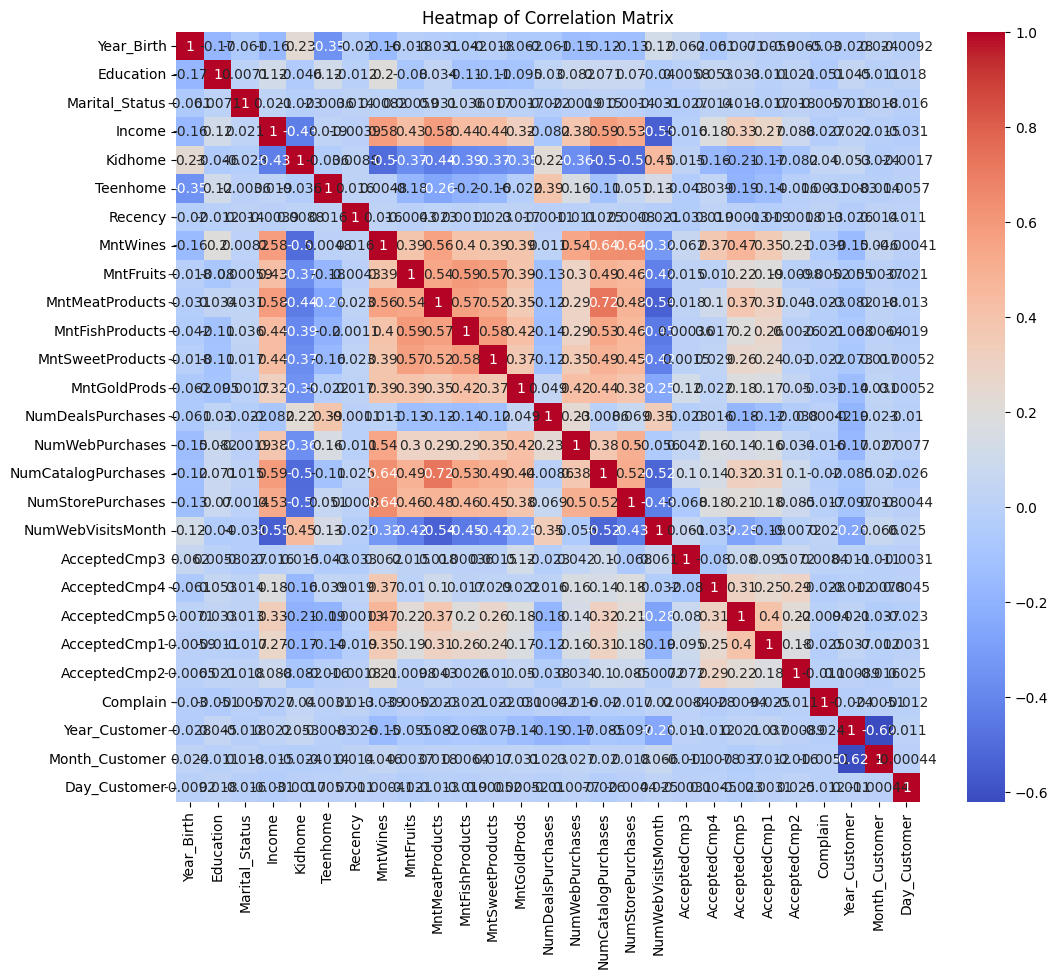

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()


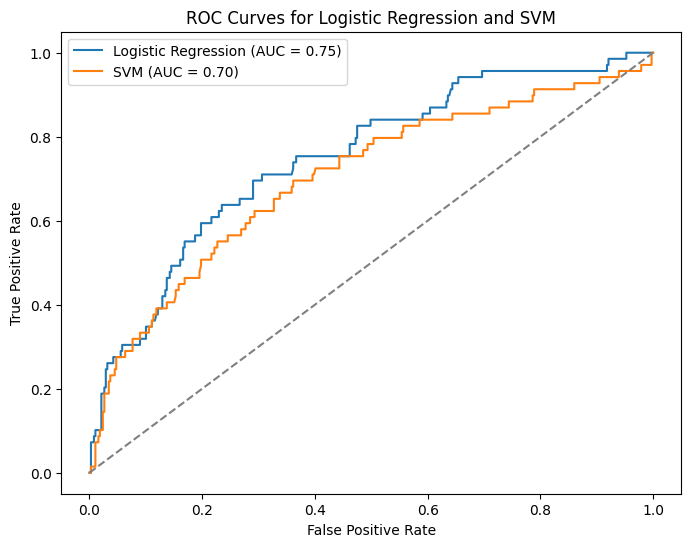

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Model regresi logistik
logreg_probs = logreg.predict_proba(x_test)[:, 1] # Probabilitas kelas positif
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
logreg_auc = roc_auc_score(y_test, logreg_probs)

# Model SVM
svm_probs = svc_model.decision_function(x_test)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = {:.2f})'.format(logreg_auc))
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression and SVM')
plt.legend()
plt.show()
